## 1. Data collection
For this homework, there is no provided dataset. Instead, you have to build your own. Your search engine will run on text documents. So, here we detail the procedure to follow for the data collection. We strongly suggest you work on different modules when implementing the required functions. For example, you may have a crawler.py module, a parser.py module, and a engine.py module: this is a good practice that improves readability in reporting and efficiency in deploying the code. Be careful; you are likely dealing with exceptions and other possible issues!

### 1.1. Get the list of master's degree courses
We start with the list of courses to include in your corpus of documents. In particular, we focus on web scrapping the MSc Degrees. Next, we want you to collect the URL associated with each site in the list from the previously collected list. The list is long and split into many pages. Therefore, we ask you to retrieve only the URLs of the places listed in the first 400 pages (each page has 15 courses, so you will end up with 6000 unique master's degree URLs).

The output of this step is a .txt file whose single line corresponds to the master's URL.

In [ ]:
import os
import requests
from datetime import datetime
from bs4 import BeautifulSoup
import pandas as pd
from  tqdm import tqdm
import time
import re
import csv
from crawler import scrape_urls
from crawler import scrape_htmls
from parser import extract_course_info

In [ ]:
#specify the URL of the degree page
url = 'https://www.findamasters.com/masters-degrees/msc-degrees'
#specify the total number of pages to scrape
pages = 400
#specify the output file name for URLs
urlfilename = 'urls.txt'
#now we call the function to scrape urls from our crawler.py script
scrape_urls(url, pages, urlfilename)

100%|██████████| 400/400 [09:56<00:00,  1.49s/it]


The URLs are now saved in the file urls.txt


*We used beautiful soup to do the webscraping and added a delay time to prevent our IP from being blocked by the website. After the scraping, we saved the urls in a urls.txt file so that we just need to do this process once in the beginning of the project. As there are 400 pages with 15 master degree urls each, our txt file got 6000 unique urls to deal with.*

### 1.2. Crawl master's degree pages
Once you get all the URLs in the first 400 pages of the list, you:

Download the HTML corresponding to each of the collected URLs.
After you collect a single page, immediately save its HTML in a file. In this way, if your program stops for any reason, you will not lose the data collected up to the stopping point.
Organize the downloaded HTML pages into folders. Each folder will contain the HTML of the courses on page 1, page 2, ... of the list of master's programs.

In [ ]:
#specify the url file name
urlfilename = 'urls.txt'
#specify the folder to contain the HTML files
htmlfolderName= 'newFolderHTML'
#now we call the function to scrape the HTMLs from the crawler script
scrape_htmls(urlfilename,htmlfolderName)

100%|██████████| 6000/6000 [2:18:18<00:00,  1.38s/it]


Now we are crawling over the master degree course pages from the urls.txt file we already have in our directory. We created an output_folder by the name 'newFolderHTML' where we have stored each of the HTMl files we get from the 6000 URLs with the name- Html-1.txt, Html-2.txt unitl ...Html-6000.txt. We will use this folder of HTMls to do the next question...

### 1.3 Parse downloaded pages
At this point, you should have all the HTML documents about the master's degree of interest, and you can start to extract specific information. The list of the information we desire for each course and their format is as follows:

Course Name (to save as courseName): string;
University (to save as universityName): string;
Faculty (to save as facultyName): string
Full or Part Time (to save as isItFullTime): string;
Short Description (to save as description): string;
Start Date (to save as startDate): string;
Fees (to save as fees): string;
Modality (to save as modality):string;
Duration (to save as duration):string;
City (to save as city): string;
Country (to save as country): string;
Presence or online modality (to save as administration): string;
Link to the page (to save as url): string.

For each master's degree, you create a course_i.tsv file of this structure:

courseName \t universityName \t  ... \t url

*To parse all the 6000 HTML documents from the HTML folder, we define a generic function that will scoop out the required specific information (if present) from the corresponding HTML files and then we call the function with the html folder name and the tsv output folder name*

*Our function takes three parameters: the html folder name, folder name to put the .tsv files inside and the urls.txt file that has the 6000 urls. Based on those 60000 urls, the function fetches the Html-i.txt file from the html folder corresponding to ith Url of the Urls.txt and scoops the information of course, university, faculty, etc using beautiful soup. It creates two rows, one as the header rows with the column names and another has the data rows with the column data and creates a course-i.tsv file with that in the tsv output folder.*

In [ ]:
# Specify the folder containing the HTML files and the output folder for TSV files and the urls.txt file
html_folder = 'newFolderHTML'
output_folder = 'folderTSV'
urls_file = 'urls.txt'
# now we call the function from the parser.py script to extract course information
extract_course_info(html_folder, output_folder, urls_file)

*after this, all the necessary course_1.tsv, course_2.tsv,....,course_6000.tsv are now in the 'folderTSV'*

This is the end of the data collection process. We have scraped the 400 pages of the degree pages website to get 6000 urls and crawled over those urls to download the HTML of each and then using beautiful soup we extracted all the information we are interested in from the 6000 urls and created 6000 Tab Separated Value (.tsv) files inside another folder. The most time consuming of all was the downloading of the HTML files looking at each of the 6000 urls. With a waiting time of 1 second, it took around 1.5 to 2 hours and with a waiting time of 2 seconds, it took double the time. The problem is, if we don't put a wait time of 2 seconds, some of the urls are not loading within that 1 second threshold, because of too many requests being provided, the website is blocking the IP address. This initially resulted in blank HTML files being downloaded for those few URLS. But with a waiting time of 2 seconds, the problem could be averted, and each of the 6000 HTML was correct. Only that we had to fragment the range of the urls.txt list we were using. Initially ran, with a range 1 to 1000, then reran with 10001 to 3000 and a last run with 30001 to 6000, actually averted the issue. To speed up the process, I employed multi-threading, but it scraped the 6000 pages in 1 minute and only downloaded 100 HTMl items with maximum 50 threads. As the load is quite high, 6000, the threads needs to be higher, but it means a considerable load on the server resulting in IP blocking again. Hence, I had to drop that idea and do it the normal way, trading off time consumption with accuracy. It took 4 hours to run, but at the end, I got all the 6000 HTMLs correctly.

My conclusion is: the webscraping is not so optimised with the beautiful soup framework. Perhaps, we can have a look at an alternative framework that is more optimised and meant for this purpose. For example: scrapy.

## 2. Search Engine

We have put our custom functions in functions.py and the search engine functions in searchEngine.py and then we put all the library that are useful to run our code and we are importing them in the beginning here so to run the code please before run this following piece of code:

In [ ]:
import requests
from datetime import datetime
from bs4 import BeautifulSoup
import pandas as pd
from  tqdm import tqdm
import time
import re
import csv
import os
import pandas as pd
import numpy as np
from collections import defaultdict
import json
import functions as f
from functions import extract_fees
from functions import preprocess_text
from functions import get__currency_rates_api
from sklearn.feature_extraction.text import TfidfVectorizer
from functions import convert_currency
from searchEngine import conjunction_search
from searchEngine import tfidf_conjunction_search_topk

Before starting with the question, Iwe have loaded all the 6000 TSV files into one dataframe using my TSV_to_dataframe function in the functions.py:

In [ ]:
column_names = [
    "courseName",
    "universityName",
    "facultyName",
    "isItFullTime",
    "description",
    "startDate",
    "fees",
    "modality",
    "duration",
    "city",
    "country",
    "administration",
    "url"
]

folder_name = 'folderTSV'
num_files = 6000

courses_df = f.TSV_to_dataframe(column_names, folder_name, num_files)

In [ ]:
courses_df.shape[0]

6000

In [ ]:
courses_df.head(3)

,courseName,universityName,facultyName,isItFullTime,description,startDate,fees,modality,duration,city,country,administration,url
0,3D Design for Virtual Environments - MSc,Glasgow Caledonian University,School of Engineering and Built Environment,Full time,3D visualisation and animation play a role in ...,September,,MSc,1 year full-time,Glasgow,United Kingdom,On Campus,https://www.findamasters.com/masters-degrees/c...
1,Accounting and Finance - MSc,University of Leeds,Leeds University Business School,Full time,Businesses and governments rely on sound finan...,September,"UK: £18,000 (Total)International: £34,750 (Total)",MSc,1 year full time,Leeds,United Kingdom,On Campus,https://www.findamasters.com/masters-degrees/c...
2,"Accounting, Accountability & Financial Managem...",King’s College London,King’s Business School,Full time,"Our Accounting, Accountability & Financial Man...",September,,MSc,1 year FT,London,United Kingdom,On Campus,https://www.findamasters.com/masters-degrees/c...


### 2.0 Preprocessing

2.0.0 Preprocessing the text

First, you must pre-process all the information collected for each MSc by:

Removing stopwords
Removing punctuation
Stemming
Anything else you think it's needed
For this purpose, you can use the `nltk library.


We have built a function preprocess_text in the functions.py using nltk corpus stopwords and Porter stemmer. We are applying the function over each rows of the dataframe here and keeping the processed text of the description column in a new column in the dataframe:

In [ ]:
# Preprocess the 'description' column
courses_df['ProcessedDescription'] = courses_df['description'].apply(preprocess_text)

In [ ]:
courses_df.loc[10,['description','ProcessedDescription']]

description             The Analytical Toxicology MSc is a unique stud...
ProcessedDescription    analyt toxicolog msc uniqu studi cours integr ...
Name: 10, dtype: object

### 2.0.1) Preprocessing the fees column
Moreover, we want the field fees to collect numeric information. As you will see, you scraped textual information for this attribute in the dataset: sketch whatever method you need (using regex, for example, to find currency symbol) to collect information and, in case of multiple information, retrieve only the highest fees. Finally, once you have collected numerical information, you likely will have different currencies: this can be chaotic, so let chatGPT guide you in the choice and deployment of an API to convert this column to a common currency of your choice (it can be USD, EUR or whatever you want). Ultimately, you will have a float column renamed fees (CHOSEN COMMON CURRENCY).

In [ ]:
courses_df[courses_df['fees']!=''][['fees']].head(5)

,fees
1,"UK: £18,000 (Total)International: £34,750 (Total)"
5,"UK: £13,750 (Total)International: £31,000 (Total)"
7,Tuition fee per year (non-EU/EEA students): 15...
8,Tuition fee per year (non-EU/EEA students): 15...
9,"UK: £12,500 (Total)International: £28,750 (Total)"


Initially, we are extracting the numerical value of fees and keeping them in the fees column and creating a currency column to keep the currency symbol, to understand which currency fees is present in the row. We are doing all of this inside the extract_fees function and that we are applying to each row in the dataframe:

In [ ]:
courses_df[['fees', 'currency']] = courses_df['fees'].apply(extract_fees).apply(pd.Series)

In [ ]:
courses_df[courses_df['fees'].notna()][['fees','currency']].head(5)

,fees,currency
1,34750.0,£
5,31000.0,£
7,15000.0,€
8,15000.0,€
9,28750.0,£


Now that we have the numeric values of the fees and the currency in the fees and currency column, we can convert the fees to a common currency. We are choosing Euro to be the common uniform currency for my case.

Our idea - we are using the exchange-rates.com API in the function get__currency_rates_api to get the currency rates in terms of Euros in a dictionary which is kept inside exchange_rates. Since, the API wants us to insert the currency that we want to convert, but for that purpose, we will need to make 6000 different api calls if apply that to each individual row and my API key has a request limit for free access. So we are just inserting Euros and getting the inverted rates in each currencies as a dictionary. Thus, in the convert_currency function, we are dividing the amount by the rate (essentially the inverted rate) to get the value in our chosen common currency. In this way, we are just making one request for this API and getting our work of conversion done applying to each row of the dataframe. At the end, we are keeping that in the fees(EUR) column.

In [ ]:
common_currency= 'EUR'
exchange_rates=get__currency_rates_api(common_currency)

In [ ]:
# Apply the conversion to the 'fees' column in the DataFrame
courses_df['fees (EUR)'] = courses_df.apply(lambda row: convert_currency(exchange_rates, row['fees'], row['currency']), axis=1)


In [ ]:
courses_df[courses_df['fees'].notna()][['fees','fees (EUR)','currency']].head(5)

,fees,fees (EUR),currency
1,34750.0,39869.21,£
5,31000.0,35566.77,£
7,15000.0,15000.00,€
8,15000.0,15000.00,€
9,28750.0,32985.31,£


As we have processed the dataframe to an extent, it is a safe idea to store the entire dataframe in a single TSV file so that, later on, we won't need to run the same code to make the dataframe but we can load it from the TSV file using pandas library.

In [ ]:
tsv_file_path = 'courses_data_processed.tsv'
courses_df.to_csv(tsv_file_path, sep='\t', index=False)

### 2.1. Conjunctive query
For the first version of the search engine, we narrowed our interest to the description of each course. It means that you will evaluate queries only concerning the course's description.

#### 2.1.1) Create your index!
Before building the index,

Create a file named vocabulary, in the format you prefer, that maps each word to an integer (term_id).
Then, the first brick of your homework is to create the Inverted Index.

**Creating Vocabulary and saving it as vocabulary.txt**

We chose to sort the terms in the vocabulary in such a way that each time the code was rerun or the kernel was restarted we had the same file or rather we always get the same vocabulary with the words being in the same order each time.
What we can say is also that this procedure is not mandatory for the consistancy of the data

In [ ]:
# Create a set to store unique terms
unique_terms = set()

# Iterate through the DataFrame to collect unique terms
for index, row in courses_df.iterrows():
    stemmed_words = row["ProcessedDescription"].split()
    unique_terms.update(stemmed_words)

# Sort the unique terms
unique_terms = sorted(unique_terms)

# Create a vocabulary by assigning term_ids to unique terms
vocabulary = {term: idx for idx, term in enumerate(unique_terms, start=1)}

# Save the sorted vocabulary to a text file
with open("vocabulary.txt", "w") as vocab_file:
    for term, term_id in vocabulary.items():
        vocab_file.write(f"{term} {term_id}\n")



**Creating Inverted Index**

In [ ]:
from collections import defaultdict
# Initialize an empty inverted index
inverted_index = defaultdict(list)

# Iterate through the DataFrame rows and update the inverted index
for index, row in courses_df.iterrows():
    stemmed_words = row["ProcessedDescription"].split()
    for term in stemmed_words:
        term_id = vocabulary.get(term)  # Get the term_id from the vocabulary
        if term_id is not None:
            inverted_index[term_id].append(index)

# Convert the defaultdict to a regular dictionary
inverted_index = dict(inverted_index)

In [ ]:
len(inverted_index)

7307

**Saving the Inverted Index as inverted_index.json**

In [ ]:
# Save the inverted index to a JSON file
import json
with open("inverted_index.json", "w") as index_file:
    json.dump(inverted_index, index_file)

#### 2.1.2) Execute the query
Given a query input by the user, for example:

advanced knowledge

**Search Engine 1.0**

Loading the dataframe we had saved in the tsv file already:

In [ ]:
courses_df=pd.read_csv('courses_data_processed.tsv',sep='\t')

Loading the vocabulary and inverted_index that we saved before:

In [ ]:
import json

# Load vocabulary from "vocabulary.txt"
vocabulary = {}
with open("vocabulary.txt", "r") as vocab_file:
    for line in vocab_file:
        term, term_id = line.strip().split()
        vocabulary[term] = int(term_id)

# Load inverted index from "inverted_index.json"
with open("inverted_index.json", "r") as index_file:
    inverted_index = json.load(index_file)


*In the searchEngine.py Iwe have built the function 'conjunction_search'. The function takes the dataframe, vocabulary, inverted_index and the query as parameters. It processes the query using nltk library and then checks the presence of every word in the query using the vocabulary and inverted index and then returns the index values which have the query words conjunctively. At the end, we printed the result_df with the necessary information required.*

In [ ]:
query = "advanced knowledge"

# Search for the query and get the matching DataFrame
result_df = conjunction_search(courses_df, vocabulary, inverted_index, query)

# Print the result DataFrame
result_df[['courseName','universityName','description','url']]


,courseName,universityName,description,url
4099,Global Meetings and Events Management MSc / PGDip,University College Birmingham,Become part of an events industry worth an est...,https://www.findamasters.com/masters-degrees/c...
2568,Dance Science MSc,University of Chichester,This suite of MSc programmes is designed for s...,https://www.findamasters.com/masters-degrees/c...
2569,Data Analysis for Business Intelligence - MSc,University of Leicester,The course is designed for students who want t...,https://www.findamasters.com/masters-degrees/c...
10,Analytical Toxicology MSc,King’s College London,The Analytical Toxicology MSc is a unique stud...,https://www.findamasters.com/masters-degrees/c...
522,Accounting and Finance - MSc,University of Sussex,On this MSc you’ll advance your accounting and...,https://www.findamasters.com/masters-degrees/c...
...,...,...,...,...
2540,Cyber Security MSc,Keele University,IT systems are a vital part of every company's...,https://www.findamasters.com/masters-degrees/c...
4590,Intelligent Transport Planning and Engineering...,University of East London,The programme is designed to meet the increasi...,https://www.findamasters.com/masters-degrees/c...
495,(MSc/PGDip/PGCert) - Advanced Clinical Practic...,University of Warwick,Imagine if you had the confidence to react mor...,https://www.findamasters.com/masters-degrees/c...
2037,Clinical Pharmacy - MSc,University of Sunderland,The Clinical Pharmacy MSc has been designed to...,https://www.findamasters.com/masters-degrees/c...


In [ ]:
print(result_df.loc[10,'description'])

The Analytical Toxicology MSc is a unique study course that integrates theoretical and practical aspects of analytical science with clinical and forensic toxicology. This course will provide you with a detailed knowledge and comprehensive understanding of advanced analytical toxicology and its applications.


### 2.2. Conjunctive query & Ranking score
For the second search engine, given a query, we want to get the top-k (the choice of k it's up to you!) documents related to the query. In particular:

Find all the documents that contain all the words in the query.
Sort them by their similarity with the query.
Return in output k documents, or all the documents with non-zero similarity with the query when the results are less than k. You must use a heap data structure (you can use Python libraries) for maintaining the top-k documents.

To solve this task, you must use the tfIdf score and the Cosine similarity. The field to consider is still the description. Let's see how.

#### 2.2.1) Create your index

**Now we created the second Inverted Index**

This index, than the first one we created above, for each word, provide the list of documents in which it is contained and the relative tfIdf score.
We used the 'sklearn.feature_extraction.text' library importing the 'TfidfVectorizer' module so we could compute the tfidf score easily and store it in a optimized manner.
The summary of what we are going to do is:
1. Pre-processes text data in a DataFrame, replacing NaN values with empty strings.
2. Using TF-IDF vectorization on the processed text to create a TF-IDF matrix. 3. Constructing an inverted index, mapping terms to document IDs with corresponding TF-IDF scores.
4. At the end what we expected to have is a dictionary representing the inverted index, providing a structured way to look up documents based on terms and their TF-IDF scores.

In [ ]:
# Pre-processing text Data replacing NaN values with an empty string in the ProcessedDescription column
courses_df["ProcessedDescription"] = courses_df["ProcessedDescription"].fillna("")

# Creation a list of processed descriptions
processed_descriptions = courses_df["ProcessedDescription"].tolist()

# TfidfVectorizer inizialitation
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(processed_descriptions)

# Get feature names (terms) and their indices
feature_names = vectorizer.get_feature_names_out()
term_indices = {term: idx for idx, term in enumerate(feature_names)}

# Initialization of an empty inverted index with tf-idf scores
tfidf_inverted_index = defaultdict(list)

# Loop through the non-zero elements of the TF-IDF matrix
for document_id, term_id in zip(*X.nonzero()):
    tfidf_score = X[document_id, term_id]
    term = feature_names[term_id]
    tfidf_inverted_index[term_indices[term]].append((document_id, tfidf_score))

# Creation of a regular dictionary by converting the defaultdict
tfidf_inverted_index = dict(tfidf_inverted_index)


**Saving the second Inverted Index just created as tfidf_inverted_index.json**

In [ ]:
import numpy as np
# Convert NumPy int32 values to Python int for serialization because we noticed
# that if we do not do this we raise an error of type object
def convert_to_builtin_type(obj):
    if isinstance(obj, np.int32):
        return int(obj)
    raise TypeError(f"Object of type {type(obj)} is not JSON serializable")

# Convert keys to strings in tfidf_inverted_index
tfidf_inverted_index_str_keys = {str(key): value for key, value in tfidf_inverted_index.items()}

# Save the inverted index to a JSON file with custom serialization
with open("tfidf_inverted_index.json", "w") as index_file:
    json.dump(tfidf_inverted_index, index_file, indent=2, default=convert_to_builtin_type)


### 2.2.2) Execute the query

In this new setting, given a query, you get the proper documents (i.e., those containing all the query's words) and sort them according to their similarity to the query. For this purpose, as the scoring function, we will use the Cosine Similarity concerning the tfIdf representations of the documents.

Given a query input by the user, for example:

advanced knowledge

The search engine is supposed to return a list of documents, ranked by their Cosine Similarity to the query entered in the input.

**Search Engine 2.0**

As we did before even now we are loading the dataframe we had saved in the tsv file already:

In [ ]:
courses_df=pd.read_csv('courses_data_processed.tsv',sep='\t')

Even now, if we did before we are loading the vocabulary and tfidf_inverted_index that we saved before:

In [ ]:
import json

# Load vocabulary from "vocabulary.txt"
vocabulary = {}
with open("vocabulary.txt", "r") as vocab_file:
    for line in vocab_file:
        term, term_id = line.strip().split()
        vocabulary[term] = int(term_id)

# Load inverted index from "inverted_index.json"
with open("tfidf_inverted_index.json", "r") as index_file:
    tfidf_inverted_index = json.load(index_file)

*In the searchEngine.py we have built the function 'conjunction_search', but not only, we have built the **'tfidf_conjunction_search_topk'**. The function takes the dataframe ('courses_df'), vocabulary, tfidf_inverted_index, the query, the number k and the vectorizer and the matrix X as parameters.
It processes the query using nltk library, identifies documents matching all query terms using the vocabulary and tfidf_inverted_index, and differently from the previous search engine, it ranks them by cosine similarity and only the top-k matching documents, along with their relevant information, are returned in a DataFrame. For maintaining the top-k documents we used a **heap data structure***

In [ ]:
# Pre-processes data
courses_df["ProcessedDescription"] = courses_df["ProcessedDescription"].fillna("")

# Create a list of processed descriptions
processed_descriptions = courses_df["ProcessedDescription"].tolist()

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(processed_descriptions)

# Set the query
query='advanced knowledge'

# Set k=10 to have the top-k
k=10

# Call the function
k_results_df = tfidf_conjunction_search_topk(courses_df, term_indices, tfidf_inverted_index, query, vectorizer, X, k)

# Give the desired output
k_results_df[['courseName', 'universityName', 'description', 'url', 'SimilarityScore']]


,courseName,universityName,description,url,SimilarityScore
739,Advanced Computing (MSc/MRes),"Birkbeck, University of London",MSc Advanced Computing:If you already work in ...,https://www.findamasters.com/masters-degrees/c...,0.463910
3788,Food and Nutrition Sciences (MSc),Sheffield Hallam University,Gain advanced food industry knowledge and prac...,https://www.findamasters.com/masters-degrees/c...,0.444054
4019,Global Biodiversity Conservation - MSc,University of Sussex,This MSc will give you advanced knowledge and ...,https://www.findamasters.com/masters-degrees/c...,0.426063
809,Advanced Mechanical Engineering - MSc,Cardiff University,This degree programme aims to provide advanced...,https://www.findamasters.com/masters-degrees/c...,0.395947
740,Advanced Computing MSc,King’s College London,Our Advanced Computing MSc provides knowledge ...,https://www.findamasters.com/masters-degrees/c...,0.388661
770,Advanced Healthcare Practice - MSc,Cardiff University,Our MSc Advanced Healthcare Practice programme...,https://www.findamasters.com/masters-degrees/c...,0.377600
737,Advanced Computing - MSc,University of the West of Scotland,Our MSc Advanced Computing course is designed ...,https://www.findamasters.com/masters-degrees/c...,0.365345
916,Advancing Practice - MSc,University of Northampton,Our MSc Advancing Practice awards support the ...,https://www.findamasters.com/masters-degrees/c...,0.355659
685,Advanced Clinical Practice MSc,University of Greenwich,Develop your skills and deepen your knowledge ...,https://www.findamasters.com/masters-degrees/c...,0.350701
815,Advanced Mechanical Engineering - MSc (Eng),University of Leeds,This course offers a broad range of advanced s...,https://www.findamasters.com/masters-degrees/c...,0.340908


## 3. Define a new score!

Now it's our turn: build a new metric to rank MSc degrees.



We have put our custom functions in functions.py and the search engine functions for this answer in searchEngineNew.py and the search engine that we recall from the question 2 in searchEngine.py and then we put all the library that are useful to run our code and we are importing them in the beginning here so to run the code please before run this following piece of code:

In [ ]:
import csv
import pandas as pd
import json
from searchEngine import conjunction_search
from searchEngineNew import calculate_score
from searchEngineNew import top_k_documents
from searchEngine import tfidf_conjunction_search_topk


Before going on we have to import our data so we can do our task, it is crucial! We store our data in a .tsv file so we don't have to pre-process always the data

In [ ]:
courses_df=pd.read_csv('courses_data_processed.tsv',sep='\t')

With the date we are importing the vocabulary and the first inverted index that we created (we saved both previously so that we have to not run every time the code to have those).

In [ ]:
import json

# Load vocabulary from "vocabulary.txt"
vocabulary = {}
with open("vocabulary.txt", "r") as vocab_file:
    for line in vocab_file:
        term, term_id = line.strip().split()
        vocabulary[term] = int(term_id)

# Load inverted index from "inverted_index.json"
with open("inverted_index.json", "r") as index_file:
    inverted_index = json.load(index_file)

**Now we arrive to the core of the task: define a new score and sort the query-related documents according to this new score.**

- **New score used:** we decided to use a weighted combination of various fields in our dataset, we thought that not only the 'description' field is relevant for the query because an user might want to search for master's degrees based on a city or based on fees payable so each field contributes to the score based on its weight, and the overall score for a document is the sum of the normalized values of numeric fields and binary scores for string fields, so the weights reflect the importance of each field in the scoring process.

- **Structure to solve the task:** After defining a new score, we sorted the documents according to it, to do this we use the heap data structure that keeps us top-k documents.

We decided we wanted to have the top-10 documents that best matched the user's query.

In [ ]:
# Query given in input from a user
query = input("Enter your query: ")

# Columns of our dataser that we want to use for the score
selected_columns = ['courseName', 'universityName', 'facultyName', 'isItFullTime',
       'description', 'startDate', 'fees', 'modality', 'duration', 'city',
       'country', 'administration', 'url', 'ProcessedDescription', 'currency',
       'fees (EUR)']

# Usage of the conjunction_search done in 2.1 to retrieve documents that matches with the query
result_df = conjunction_search(courses_df, vocabulary, inverted_index, query)

# Set the columns that we are using for scoring
documents = result_df[selected_columns].to_dict(orient='records')

# Define weights for scoring that reflect the importance of each field in the scoring process
weights = {
    "courseName": 0.1,
    "universityName": 0.2,
    "facultyName": 0.15,
    "isItFullTime": 0.05,
    "description": 0.2,
    "startDate": 0.08,
    "fees": 0.05,
    "modality": 0.1,
    "duration": 0.1,
    "city": 0.1,
    "country": 0.2,
    "administration": 0.15,
    "url": 0.05,
    'ProcessedDescription':0.1,
    'currency':0.05,
    'fees (EUR)':0.05
}

# Number of top-k documents you want to retrieve
k = 10

# Retrieve and print the top-k documents using the function in searchEngineNew.py
result = top_k_documents(documents, query, weights, k)
result[['courseName','universityName','description','url', 'MyScore']]

,courseName,universityName,description,url,MyScore
0,Electronics Engineering,Linköping University,This programme focuses on the design of integr...,https://www.findamasters.com/masters-degrees/c...,0.524305
1,Electric Vehicle Systems MSc,Brunel University London,Our Electric Vehicle Systems MSc degree has be...,https://www.findamasters.com/masters-degrees/c...,0.404697
2,Computational Finance MSc,University College London,The Computational Finance MSc at UCL provides ...,https://www.findamasters.com/masters-degrees/c...,0.333067
3,International Business MSc,University of Leicester,This is for you if you want to enhance your ex...,https://www.findamasters.com/masters-degrees/c...,0.301789
4,Financial Risk Management MSc,University College London,The Financial Risk Management MSc at UCL provi...,https://www.findamasters.com/masters-degrees/c...,0.246805
5,Criminal Justice and Criminology - MSc,University of Leeds,Develop advanced knowledge in the study of cri...,https://www.findamasters.com/masters-degrees/c...,0.242466
6,MSc International Management,University of Nottingham Ningbo China,The MSc International Management programme fur...,https://www.findamasters.com/masters-degrees/c...,0.236929
7,Chemistry - Analysis of Pharmaceutical Compoun...,University College Cork,MSc degree courses are provided in three key a...,https://www.findamasters.com/masters-degrees/c...,0.231994
8,Chemistry - Analytical Chemistry MSc,University College Cork,MSc degree courses are provided in three key a...,https://www.findamasters.com/masters-degrees/c...,0.231994
9,Chemistry - Environmental Analytical Chemistry...,University College Cork,MSc degree courses are provided in three key a...,https://www.findamasters.com/masters-degrees/c...,0.231994


**Let's now focus on analyzing the results obtained with our new score function and the function based on cosine similarity (done in the question 2.2)**

In question 2.2 we used cosine similarity to sort documents based on their tf-idf, at first glance reflecting without comparing the results it might seem that just that function works better than our new score because it is based on mathematical computations and in particular it is based on tf-idf which is what is used purely in text mining.
Comparing the results, however, we can make the following observations:
- The function based on cosine similarity exploits and processes only the 'description' column of our dataset thus going to extract query-related documents based on the 'description' field
- The function based on our new score processes all columns in our dataset and then goes to extract query-related documents by scrolling and 'weighing' each field in our dataset
This leads us to conclude that in case a user enters a query in which there is the name of a specific country/university or a range of fees for his master degree program the function we described in 2.2 is definitely less effective than the new score we created because the latter goes and parses all the fields in the dataset.

On the other hand if we use as a score the cosine similarity being a well-defined metric in the case where the query is the same when we go to apply the two score functions then in that case the precision is greater.
So we can conclude that based on our dataset and how we have processed the columns and data what is the best score function depends on what we are interested in and then it depends on the particular query and we can attest this with just one example: **comparing the results of the function that uses cosine similarity and the one that uses our new score when the query is the same, i.e. 'advanced knowledge'**.

To this end the output that see in the previous cell was made by entering 'advanced knowledge' as the input query, now in the following cells we call up the previously saved 'tfidf_inverted_index.json' file and the function used in 2.2 to define the top-10 documents and we analyze the two outputs and make a brief comparison.

In [ ]:
# Importing the tfidf_inverted_index.json' for the comparison

import json

# Load inverted index from "inverted_index.json"
with open("tfidf_inverted_index.json", "r") as index_file:
    tfidf_inverted_index = json.load(index_file)

In [ ]:
# Rerun the function used in 2.2 to have the top-10 query-related document

from sklearn.feature_extraction.text import TfidfVectorizer

# Pre-processes data
courses_df["ProcessedDescription"] = courses_df["ProcessedDescription"].fillna("")

# Create a list of processed descriptions
processed_descriptions = courses_df["ProcessedDescription"].tolist()

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(processed_descriptions)
feature_names = vectorizer.get_feature_names_out()
term_indices = {term: idx for idx, term in enumerate(feature_names)}

# Set the query
query='advanced knowledge'

# Set k=10 to have the top-k
k=10

# Call the function
k_results_df = tfidf_conjunction_search_topk(courses_df, term_indices, tfidf_inverted_index, query, vectorizer, X, k)

# Give the desired output
k_results_df[['courseName', 'universityName', 'description', 'url', 'SimilarityScore']]

,courseName,universityName,description,url,SimilarityScore
739,Advanced Computing (MSc/MRes),"Birkbeck, University of London",MSc Advanced Computing:If you already work in ...,https://www.findamasters.com/masters-degrees/c...,0.463910
3788,Food and Nutrition Sciences (MSc),Sheffield Hallam University,Gain advanced food industry knowledge and prac...,https://www.findamasters.com/masters-degrees/c...,0.444054
4019,Global Biodiversity Conservation - MSc,University of Sussex,This MSc will give you advanced knowledge and ...,https://www.findamasters.com/masters-degrees/c...,0.426063
809,Advanced Mechanical Engineering - MSc,Cardiff University,This degree programme aims to provide advanced...,https://www.findamasters.com/masters-degrees/c...,0.395947
740,Advanced Computing MSc,King’s College London,Our Advanced Computing MSc provides knowledge ...,https://www.findamasters.com/masters-degrees/c...,0.388661
770,Advanced Healthcare Practice - MSc,Cardiff University,Our MSc Advanced Healthcare Practice programme...,https://www.findamasters.com/masters-degrees/c...,0.377600
737,Advanced Computing - MSc,University of the West of Scotland,Our MSc Advanced Computing course is designed ...,https://www.findamasters.com/masters-degrees/c...,0.365345
916,Advancing Practice - MSc,University of Northampton,Our MSc Advancing Practice awards support the ...,https://www.findamasters.com/masters-degrees/c...,0.355659
685,Advanced Clinical Practice MSc,University of Greenwich,Develop your skills and deepen your knowledge ...,https://www.findamasters.com/masters-degrees/c...,0.350701
815,Advanced Mechanical Engineering - MSc (Eng),University of Leeds,This course offers a broad range of advanced s...,https://www.findamasters.com/masters-degrees/c...,0.340908


Now, that we have both results we can do a comparative analysis of TF-IDF and New Score methods for retrieval based on the query "advanced knowledge"

Recall briefly what these two methods do: the first method, the new score method applies a weighted scoring algorithm that considers multiple attributes of courses, instead the other, the TF-IDF method involves preprocessing course descriptions, creating a TF-IDF matrix, and then calculating cosine similarity scores between the query and each course description in the dataset, so the documents (courses) are ranked based on these similarity scores.

What can we notice is that the execution of the TF-IDF method on a dataset of course descriptions resulted in a list of courses where titles and descriptions closely matched the query "advanced knowledge", indeed the top-10 results include courses like "Advanced Computing (MSc/MRes)" and "Advanced Mechanical Engineering - MSc", each with a corresponding similarity score, on the other hand our new score method retrieved a diverse set of courses, with scores based on the weighted sum of various attributes, this method provided a broader perspective, taking into account multiple factors beyond the textual similarity of course descriptions to the query. If we do a comparison what we find out is that the TF-IDF method demonstrated high relevance in its results, with courses closely aligned to the query and the high cosine similarity scores indicate a strong textual match, instead, the new score function, while offering a range of courses, did not match the direct relevance achieved by the TF-IDF method for the specific query used.
We asked themselves on how it can be possible and we find out that maybe TF-IDF scores are based solely on textual relevance, making it highly effective for specific keyword-based queries instead the other method is a multifaceted approach and this allows for a more nuanced evaluation of courses, considering various attributes, which can be advantageous for more complex or multi-dimensional queries tant includes not only descprition texts but that can involve city, country, number to retry fees and so on.

In conclusion as we said above, before the example, our score function is more adaptable, allowing for the adjustment of weights based on different criteria and this makes it suitable for a variety of queries and user preferences, instead the TF-IDF method is more suited for queries where direct textual relevance is paramount and for this reason for this specific example (usage of the query "advanced knowledge") we can say that the TF-IDF method outperformed the other method in terms of retrieving courses with direct textual relevance to the query. However, the method based on our new score strength lies in its adaptability and comprehensive approach, considering a wider range of course attributes.

So at the end what can we say it is that the choice between TF-IDF and new score methods should be guided by the specific needs of the query and the desired breadth of course retrieval

## QUESTION 4

In this exercise, we aim to represent various courses on a geographic map, in order to see their location.
We also want the map to show their associated taxation.

At first, let's import the dataset and take a look to the variables we are interested in.

In [1]:
import pandas as pd

courses = pd.read_csv("courses_data_processed.tsv", sep='\t')

In [2]:
print(courses[["courseName", "city", "country"]].head(5))

                                          courseName     city         country
0           3D Design for Virtual Environments - MSc  Glasgow  United Kingdom
1                       Accounting and Finance - MSc    Leeds  United Kingdom
2  Accounting, Accountability & Financial Managem...   London  United Kingdom
3  Accounting, Financial Management and Digital B...  Reading  United Kingdom
4                                     Addictions MSc   London  United Kingdom


Now we import some of the packages we will need.

In [ ]:
!pip install keplergl
!pip install googlemaps
!pip install gmaps
!pip install geopandas

In [4]:
from googlemaps import Client as GoogleMaps
import googlemaps
import gmaps
from keplergl import KeplerGl
import geopandas as gpd

We need 'city' and 'country' to define a new variable, 'Full_Address,' which we will use to import coordinates from Google Maps.

In [5]:
courses['Full_Address'] = courses['city'] + ',' + courses['country']
print(courses['Full_Address'])

0       Glasgow,United Kingdom
1         Leeds,United Kingdom
2        London,United Kingdom
3       Reading,United Kingdom
4        London,United Kingdom
                 ...          
5995               Padua,Italy
5996    Swansea,United Kingdom
5997    Swansea,United Kingdom
5998    Swansea,United Kingdom
5999     London,United Kingdom
Name: Full_Address, Length: 6000, dtype: object


Now let's insert the API key obtained by signing up for Google Developer Console, to obtain latitude and longitude coordinates from 'Full_Address'.

In [24]:
import os
from dotenv import load_dotenv
load_dotenv()
gmaps_api_key = os.getenv("GMAPS_KEY")

We have masked the API key for security purposes.

In [25]:
gmaps = googlemaps.Client(key=gmaps_api_key)

Let's just pass the 'Full_address' column to the google API.

In [7]:
courses1= courses.iloc[:,-1:].copy()
courses1.head()

,Full_Address
0,"Glasgow,United Kingdom"
1,"Leeds,United Kingdom"
2,"London,United Kingdom"
3,"Reading,United Kingdom"
4,"London,United Kingdom"


Now we create two empty columns that will be filled with the latitude and longitude coordinates.

In [8]:
courses1['long'] = ""
courses1['lat'] = ""

Using the Google Maps Geocoding API to retrieve latitude and longitude coordinates for addresses stored in the 'Full_Address' column of the 'courses1' DataFrame.

In [9]:
for x in range(len(courses1)): #iterate over the rows of the 'courses1'
    geocode_result = gmaps.geocode(courses1['Full_Address'][x]) #send a geocoding request to the Google Maps Geocoding API for the address in the 'Full_Address' column of the current row
    if geocode_result: #check if the geocoding request was successful
        #latitude and longitude coordinates are extracted from the API response and assigned to the 'lat' and 'long' columns of the 'courses1'
        courses1['lat'][x] = geocode_result[0]['geometry']['location']['lat']
        courses1['long'][x] = geocode_result[0]['geometry']['location']['lng']
    else:
        #if we don't have any result it sets the 'lat' and 'long' columns for the current row to empty strings
        courses1['lat'][x] = ""
        courses1['long'][x] = ""

Insert the new variables in the original dataset.

In [10]:
courses['Lat']=courses1['lat']
courses['Lon']= courses1['long']
courses.head()

,courseName,universityName,facultyName,isItFullTime,description,startDate,fees,modality,duration,city,country,administration,url,ProcessedDescription,currency,fees (EUR),Full_Address,Lat,Lon
0,3D Design for Virtual Environments - MSc,Glasgow Caledonian University,School of Engineering and Built Environment,Full time,3D visualisation and animation play a role in ...,September,NaN,MSc,1 year full-time,Glasgow,United Kingdom,On Campus,https://www.findamasters.com/masters-degrees/c...,3d visualis anim play role mani area popular m...,NaN,NaN,"Glasgow,United Kingdom",55.86167,-4.258335
1,Accounting and Finance - MSc,University of Leeds,Leeds University Business School,Full time,Businesses and governments rely on sound finan...,September,34750.0,MSc,1 year full time,Leeds,United Kingdom,On Campus,https://www.findamasters.com/masters-degrees/c...,busi govern reli sound financi knowledg underp...,£,39869.21,"Leeds,United Kingdom",53.800755,-1.549077
2,"Accounting, Accountability & Financial Managem...",King’s College London,King’s Business School,Full time,"Our Accounting, Accountability & Financial Man...",September,NaN,MSc,1 year FT,London,United Kingdom,On Campus,https://www.findamasters.com/masters-degrees/c...,account account financi manag msc cours provi...,NaN,NaN,"London,United Kingdom",51.507218,-0.127586
3,"Accounting, Financial Management and Digital B...",University of Reading,Henley Business School,Full time,Embark on a professional accounting career wit...,September,NaN,MSc,1 year full time,Reading,United Kingdom,On Campus,https://www.findamasters.com/masters-degrees/c...,embark profession account career academ ground,NaN,NaN,"Reading,United Kingdom",51.45512,-0.978747
4,Addictions MSc,King’s College London,"Institute of Psychiatry, Psychology and Neuros...",Full time&Part time,Join us for an online session for prospective ...,September,NaN,MSc,One year FT,London,United Kingdom,On Campus,https://www.findamasters.com/masters-degrees/c...,join us onlin session prospect student find ms...,NaN,NaN,"London,United Kingdom",51.507218,-0.127586


At this point, we have the coordinates for the city and country of each course.
Now, we want to be able to visualize information about the cost of the courses on the map.

In [11]:
#Drop the null values
courses = courses.dropna(subset=["fees (EUR)"])
print(courses["fees (EUR)"])

1       39869.21
5       35566.77
7       15000.00
8       15000.00
9       32985.31
          ...   
5982     3203.07
5983    29900.00
5984    29900.00
5992    16177.15
5999    16177.15
Name: fees (EUR), Length: 1228, dtype: float64


Now we have 1228 courses.

Let's divide the variable into price ranges.

In [12]:
#See what's the maximum price
print(max(courses['fees (EUR)']))

114160191.6


In [13]:
#Define the ranges and create a new variable
intervals=[0, 1000, 10000, 100000, 1000000, max(courses['fees (EUR)'])]
labels = ['<1k', '1k-10k', '10k-100k', '100k-1M', '>1M']
courses['fees_interval'] = pd.cut(courses['fees (EUR)'], bins=intervals, labels=labels)

#Let's see how many courses we have for each range
print(courses['fees_interval'].value_counts())

fees_interval
10k-100k    936
1k-10k      148
<1k         118
100k-1M       9
>1M           3
Name: count, dtype: int64


Now finally let's see the map. Visualize it in **Map.html.**

In [ ]:
!pip install folium
!pip install folium --upgrade

In [18]:
import folium
from folium.plugins import MarkerCluster

In [19]:
# Create a map centered on an initial location.
m = folium.Map(location=[courses['Lat'].mean(), courses['Lon'].mean()], zoom_start=10)

# Create a marker cluster.
marker_cluster = MarkerCluster().add_to(m)

# Define colors and default color.
colors = {'<1k': 'blue', '1k-10k': 'green', '10k-100k': 'orange', '100k-1M': 'red', '>1M': 'purple'}
default_color = 'gray'  # Default color for values NaN

# Iterate through the DataFrame and add markers to the cluster
for index, row in courses.iterrows():
    fee_interval = row['fees_interval'] if not pd.isna(row['fees_interval']) else None
    color = colors.get(fee_interval, default_color)

    # Create a popup with additional information.
    popup_content = f"<strong>Course:</strong> {row['courseName']}<br>" \
                    f"<strong>Fees (EUR):</strong> {row['fees (EUR)']}<br>" \
                    f"<strong>City:</strong> {row['city']}<br>" \
                    f"<strong>Country:</strong> {row['country']}"

    # Add the marker to the cluster with the appropriate color, and the course name as a label.
    folium.Marker([row['Lat'], row['Lon']],
                  popup=folium.Popup(popup_content, max_width=300),
                  icon=folium.Icon(color=color),
                  tooltip=row['courseName']).add_to(marker_cluster)

# Add legend
legend_html = '''
     <div style="position: fixed;
                 bottom: 50px; left: 50px; width: 150px; height: 180px;
                 border:2px solid grey; z-index:9999; font-size:14px;
                 background-color:white; opacity: .85;">
     &nbsp; Fees ranges <br>
     &nbsp; <1k <i style="background: blue; width: 18px; height: 18px; border-radius: 50%; display: inline-block;"></i><br>
     &nbsp; 1k-10k <i style="background: green; width: 18px; height: 18px; border-radius: 50%; display: inline-block;"></i><br>
     &nbsp; 10k-100k <i style="background: orange; width: 18px; height: 18px; border-radius: 50%; display: inline-block;"></i><br>
     &nbsp; 100k-1M <i style="background: red; width: 18px; height: 18px; border-radius: 50%; display: inline-block;"></i><br>
     &nbsp; >1M <i style="background: purple; width: 18px; height: 18px; border-radius: 50%; display: inline-block;"></i><br>
      </div>
     '''

m.get_root().html.add_child(folium.Element(legend_html))

# Display the map
m


In [20]:
m.save("Map.html")

The result output is saved as Map.html which you can download and open to see the result.

## 6. Command Line Question

In [ ]:
#!/bin/bash

# Delete merged_courses.tsv if it exists
rm -f merged_courses.tsv

# First take the header from the first file
head -n 1 folderTSV/course_1.tsv > merged_courses.tsv

# Now loop over all the files from 1 to 6000, and append the contents to the merge file.
# We start from file number 2 because we already took the header from file 1.
for i in {2..6000}
do
    # Use awk to print all lines except the first one (which is the header)
    awk 'FNR > 1' folderTSV/course_${i}.tsv >> merged_courses.tsv
done

echo "Which country offers the most Master's Degrees?"
# For country
cut -f11 merged_courses.tsv | sort | uniq -c | sort -nr | awk '{print $2,$3}' | head -n1

echo "Which city?"
# For city
cut -f10 merged_courses.tsv | sort | uniq -c | sort -nr | awk '{print $2}' | head -n1

echo "How many colleges offer Part-Time education?"
# For Part-Time
cut -f4 merged_courses.tsv | grep -i 'Part time' | wc -l

echo "Print the percentage of courses in Engineering (the word "Engineer" is contained in the course's name)."
# Count total number of lines (subtracting 1 for the header)
total_lines=$(($(wc -l < merged_courses.tsv) - 1))

# Count the number of lines containing the word "Engineer"
engineer_lines=$(cut -f1 merged_courses.tsv | grep -i 'Engineer' | wc -l)

# Calculate the percentage
engineer_percentage=$(awk "BEGIN {print ($engineer_lines / $total_lines) * 100}")
echo "$engineer_percentage%"

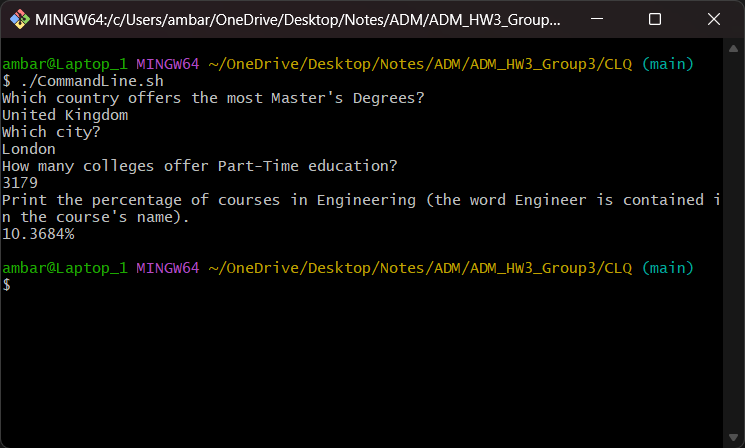

## 7. Algorithmic Question
Leonardo is an intern at a company. He is paid based on the total number of hours he has worked. They agreed __d__ days ago that Leonardo could not work less than $minTime_i$ or more than $maxTime_i$ hours per <ins>i-th</ins> day. Furthermore, he was warned by HR that on his last day at the company, he should provide a detailed report on how many hours he worked <ins>each day</ins> for the previous d days.

Today is the day Leonardo should report to HR, but the problem is that he <ins>didn't</ins> account for how many hours he put in for each day, so he only has the __total sum of the hours__ ($sumHours$) he put in total in these d days. He believes that if he creates a report in which each number $dayHours_i$ corresponds to the __total hours he worked on the i-th day__ while satisfying the HR limitations and the total sum of all $dayHours_i$ equals $sumHours$, he would be fine.

He cannot create such a report independently and requests your assistance. He will give you the number of days $d$, total hours spent $sumHours$, and the HR limitations for each day $i$, and he wants you to assist him in determining whether it is possible to create such a fake report. If that is possible, make such a report.

**Input**

The first line of input contains two integers __d__, $sumHours$ - the number of days Leonardo worked there and the total number of hours he worked for the company. Each of the following __d__ lines contains two integer numbers $minTime_i$ and $maxTime_i$ - the minimum and maximum hours he can work on the $i_{th}$ day.

**Output**

If such a report cannot be generated, print 'NO' in one output line. If such a report is possible, print 'YES' in the output and d numbers - the number of hours Leonardo spent each day - in the second line. If more than one solution exists, print any of them.

__Input 1__
```
2 5
0 1
3 5
```
__Output 1__
```
YES
1 4
```
---
__Input 2__
```
1 1
5 6
```
__Output 2__
```
NO
```

1. Implement a code to solve the above mentioned problem.

2. What is the __time complexity__ (the Big O notation) of your solution? Please provide a <ins>detailed explanation</ins> of how you calculated the time complexity.

3. Ask ChatGPT or any other LLM chatbot tool to check your code's time complexity (the Big O notation). Compare your answer to theirs. Do you believe this is correct? If the <ins>two differ</ins>, which one is right? (why?)
   
4. What do you think of the __optimality__ of your code? Do you believe it is optimal? Can you improve? Please <ins>elaborate</ins> on your response.

------------------------

### 1. Implement a code to solve the above mentioned problem.

In [ ]:
def can_make_report(days, total_hours, min_times, max_times):
    if total_hours < sum(min_times) or total_hours > sum(max_times):
        print("NO")
        return

    daily_hours = [0] * days
    hours_remaining = total_hours

    for i in range(days):
        min_time = min_times[i]
        max_time = max_times[i]

        if hours_remaining < min_time:
            print("NO")
            return

        daily_hours[i] = min(max_time, hours_remaining)
        hours_remaining -= daily_hours[i]

    print("YES")
    print(*daily_hours)
    return

days, total_hours = map(int, input().split())
min_times = []
max_times = []

for i in range(days):
    min_time, max_time = map(int, input().split())
    min_times.append(min_time)
    max_times.append(max_time)

can_make_report(days, total_hours, min_times, max_times)

YES
1 4


------------------

### 2. What is the __time complexity__ (the Big O notation) of your solution? Please provide a <ins>detailed explanation</ins> of how you calculated the time complexity.

The time complexity of my solution is O(d) because the dominant operations that take up most of the runtime all depend on the number of days d.

Specifically:

- Reading the input takes O(d) time since we loop over the days to read min_times and max_times.

- Summing min_times and max_times takes O(d) time as we iterate over all elements.

- The main calculation loop runs d iterations, doing constant work in each, so it takes O(d) time overall.

- Printing the output takes O(d) time as we print each of the d daily hours.

So when we add up the time complexities of these major steps, we get O(d) + O(d) + O(d) + O(d), which simplifies to O(d).

The key insight is that the significant operations in my solution, like loops and summations, involve iterating over all days. So the time complexity scales linearly with the size of the input, which is the number of days d. This shows my solution has an overall time complexity of O(d).

----------------------

### 3. Ask ChatGPT or any other LLM chatbot tool to check your code's time complexity (the Big O notation). Compare your answer to theirs. Do you believe this is correct? If the <ins>two differ</ins>, which one is right? (why?)

Chatgpt's answer:

Your solution's time complexity is __O(d)__, where __d__ is the number of days Leonardo worked. The reason behind this is as follows:

1. The main part of the solution is a loop that runs __d__ times, which happens to be the length of `min_times` and `max_times` lists. Here, each iteration of the loop represents one day of work for Leonardo. Inside this loop, you are performing a constant number of operations (like assignment, subtraction, and the min function), all of which have O(1) complexity.

```python
for i in range(days):
    min_time = min_times[i]
    max_time = max_times[i]

    if hours_remaining < min_time:
        print("NO")
        return

    daily_hours[i] = min(max_time, hours_remaining)
    hours_remaining -= daily_hours[i]
```

2. Before this loop, you are also calculating the sum of `min_times` and `max_times`. Both these operations will run in __O(d)__ time complexity since you're iterating through each element in the list once.

```python
if total_hours < sum(min_times) or total_hours > sum(max_times):
    print("NO")
    return
```

3. In the end, you're printing the `daily_hours` list which again is an operation with __O(d)__ time complexity.

Therefore, every significant operation in your solution is linearly dependent on the number of days, __d__. Hence, the final time complexity of your solution is __O(d)__.

So, both my answer and ChatGPT's answer are correct and essentially the same.

---------

### 4. What do you think of the __optimality__ of your code? Do you believe it is optimal? Can you improve? Please <ins>elaborate</ins> on your response.

The code is as efficient as possible for time and space complexities:

- The time complexity of O(d) is optimal since we need to process each of the d days at least once. All major steps like input, checking constraints, calculation, and output take O(d) time by iterating over the days.

- The space complexity of O(d) is also optimal because we must store the min/max constraints and results for each day. No way to reduce this.

----------------